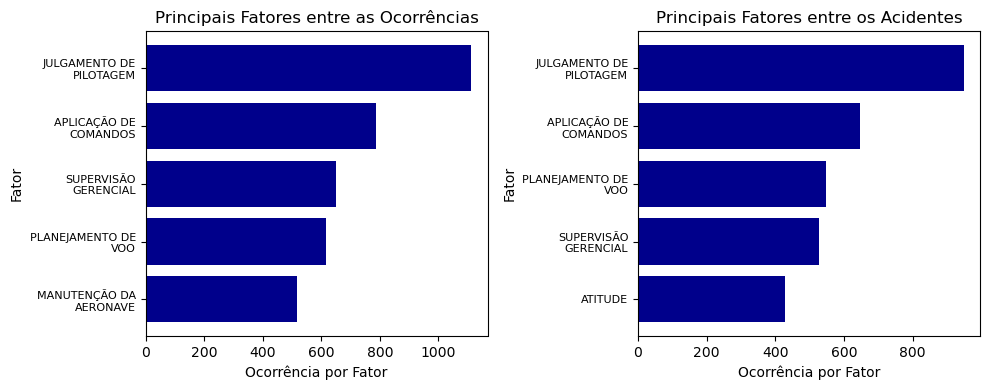

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap

ocorrencia = pd.read_csv('ocorrencia.csv', encoding='latin1', sep=';')
fator_contribuinte = pd.read_csv('fator_contribuinte.csv', encoding='latin1', sep=';')
aeronave = pd.read_csv('aeronave.csv', encoding='latin1', sep=';')
ocorrencia_tipo = pd.read_csv('ocorrencia_tipo.csv', encoding='latin1', sep=';')

ocorrencia_fator = pd.merge(ocorrencia, fator_contribuinte, on='codigo_ocorrencia3', how='inner')

acidentes = ocorrencia_fator[ocorrencia_fator['ocorrencia_classificacao'] == 'ACIDENTE']

ctg_ocorrencia_fator = fator_contribuinte['fator_nome'].value_counts()
top_5 = (ctg_ocorrencia_fator.head(5)).sort_values(ascending=True) #5 principais fatores do maior para o menor

ctg_acidentes = acidentes['fator_nome'].value_counts()
top_5_acidentes = (ctg_acidentes.head(5)).sort_values(ascending=True) 

largura = 15
fatores = ['\n'.join(textwrap.wrap(nome, width=largura)) for nome in top_5.index]
fatores_oc_graves = ['\n'.join(textwrap.wrap(nome, width=largura)) for nome in top_5_acidentes.index]

fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].tick_params(axis='y', labelsize=8)
axes[0].barh(fatores, top_5.values, color='darkblue')
axes[0].set_title("Principais Fatores entre as Ocorrências")
axes[0].set_xlabel("Ocorrência por Fator")
axes[0].set_ylabel("Fator")

axes[1].tick_params(axis='y', labelsize=8)
axes[1].barh(fatores_oc_graves, top_5_acidentes.values, color='darkblue')
axes[1].set_title("Principais Fatores entre os Acidentes")
axes[1].set_xlabel("Ocorrência por Fator")
axes[1].set_ylabel("Fator")

plt.subplots_adjust(left=0.15, wspace=0.6)

#plt.savefig('fator-contribuinte-mais-comum.png')

plt.tight_layout()
plt.show()



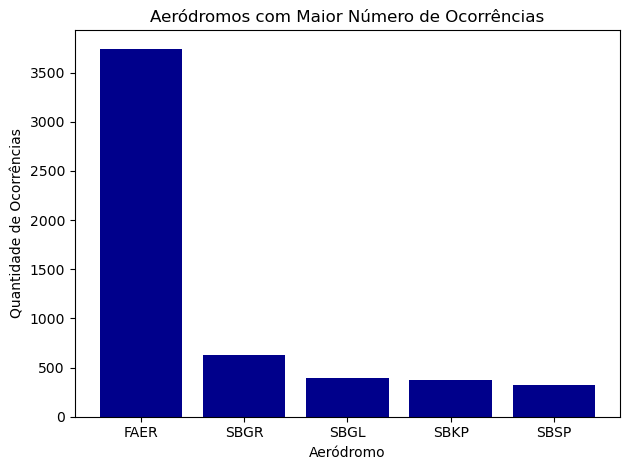

In [14]:
ocorrencia_aerodromo = ocorrencia['ocorrencia_aerodromo'].value_counts()
top_5 = ocorrencia_aerodromo.head(5)

plt.bar(top_5.index, top_5.values, color='darkblue')
plt.title("Aeródromos com Maior Número de Ocorrências")
plt.xlabel("Aeródromo")
plt.ylabel("Quantidade de Ocorrências")
#plt.savefig('aerodromos-maiores-ocorrencias.png')
plt.tight_layout()
plt.show()


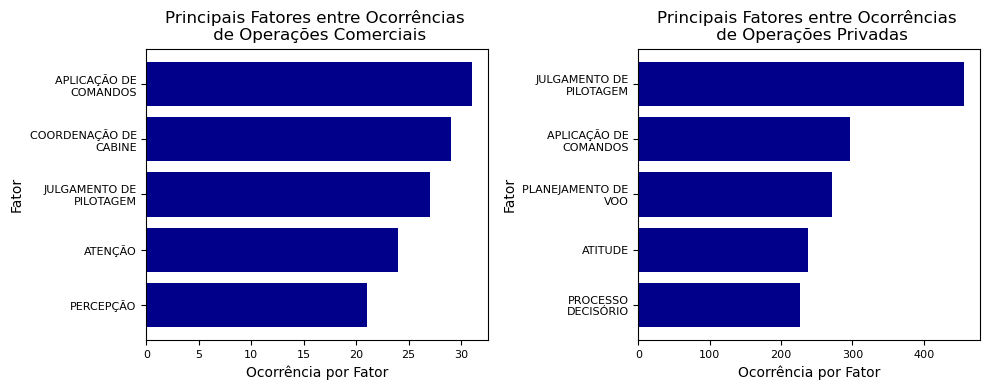

In [19]:
fator_aeronave = pd.merge(aeronave, fator_contribuinte, left_on='codigo_ocorrencia2', right_on='codigo_ocorrencia3', how='inner')

operacao_regular = fator_aeronave[fator_aeronave['aeronave_tipo_operacao'] == 'REGULAR']
ctg_fator = operacao_regular['fator_nome'].value_counts()
top_5_ctg_fator = (ctg_fator.head(5)).sort_values(ascending=True)

operacao_privada = fator_aeronave[fator_aeronave['aeronave_tipo_operacao'] == 'PRIVADA']
ctg_privada = operacao_privada['fator_nome'].value_counts()
top_5_ctg_privada = (ctg_privada.head(5)).sort_values(ascending=True)

largura = 15
regulares = ['\n'.join(textwrap.wrap(nome, width=largura)) for nome in top_5_ctg_fator.index]
fatores = ['\n'.join(textwrap.wrap(nome, width=largura)) for nome in top_5_ctg_privada.index]

fig, axes = plt.subplots(1, 2, figsize=(10,4))

axes[0].tick_params(axis='both', labelsize=8)
axes[0].barh(regulares, top_5_ctg_fator.values, color='darkblue')
axes[0].set_title("Principais Fatores entre Ocorrências \n de Operações Comerciais")
axes[0].set_xlabel("Ocorrência por Fator")
axes[0].set_ylabel("Fator")

axes[1].tick_params(axis='both', labelsize=8)
axes[1].barh(fatores, top_5_ctg_privada.values, color='darkblue')
axes[1].set_title("Principais Fatores entre Ocorrências \n de Operações Privadas")
axes[1].set_xlabel("Ocorrência por Fator")
axes[1].set_ylabel("Fator")

plt.subplots_adjust(left=0.15, wspace=0.6)

#plt.savefig('fatores_ocorencias_privadas_comerciais.png')

plt.tight_layout()
plt.show()



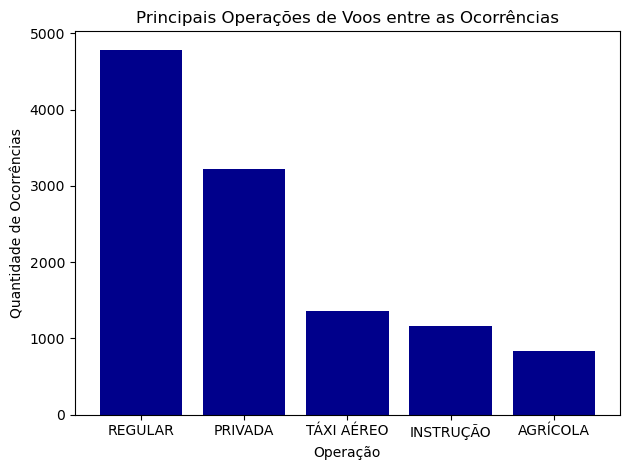

In [20]:
aeronave_tipo_operacao = aeronave[aeronave['aeronave_tipo_operacao'] != '***']['aeronave_tipo_operacao'].value_counts()
top_5 = aeronave_tipo_operacao.head(5)

plt.bar(top_5.index, top_5.values, color='darkblue')
plt.title("Principais Operações de Voos entre as Ocorrências")
plt.xlabel("Operação")
plt.ylabel("Quantidade de Ocorrências")
#plt.savefig('tipos-voos.png')
plt.tight_layout()
plt.show()

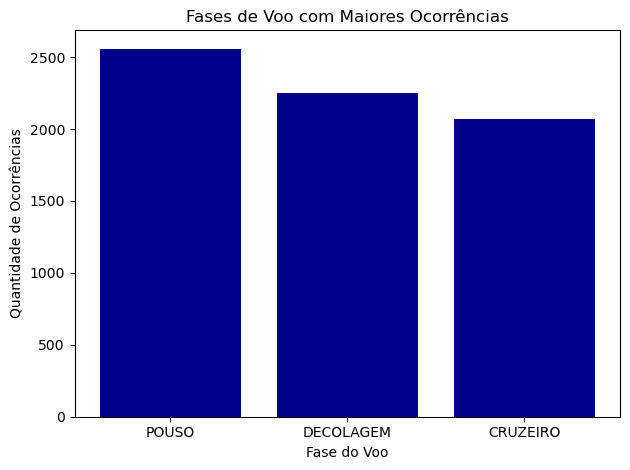

In [57]:
ocorrencia_aeronave = pd.merge(ocorrencia, aeronave, on='codigo_ocorrencia2', how='inner')
aeronave_fase = (ocorrencia_aeronave['aeronave_fase_operacao'].value_counts()).head(3)

plt.bar(aeronave_fase.index, aeronave_fase.values, color='darkblue')
plt.title("Fases de Voo com Maiores Ocorrências")
plt.xlabel("Fase do Voo")
plt.ylabel("Quantidade de Ocorrências")
#plt.savefig('fases-voos.png')
plt.tight_layout()
plt.show()

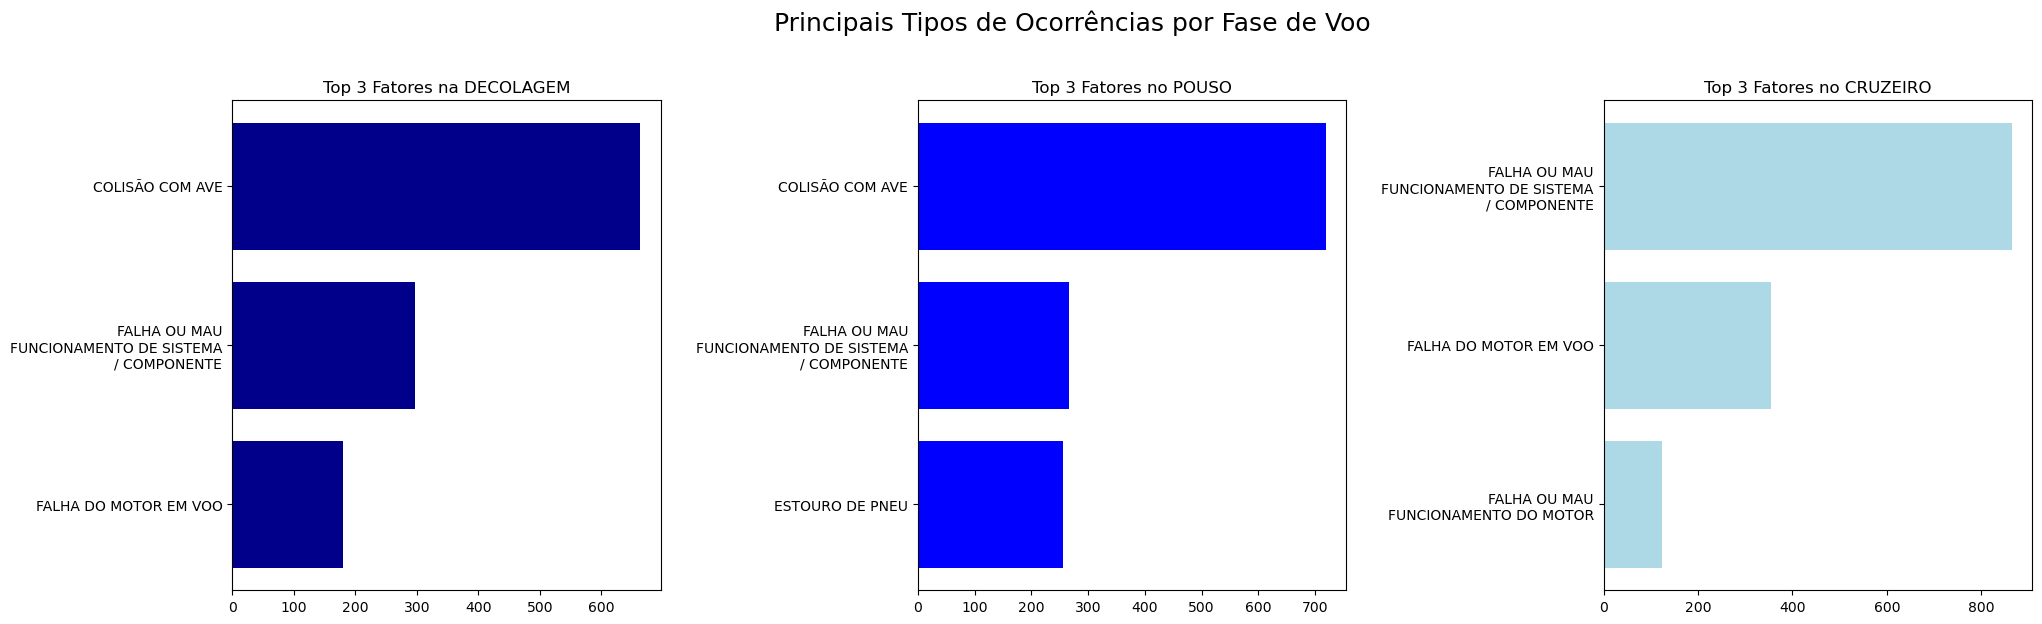

In [56]:
ocorrencia_tipo_aeronave = pd.merge(ocorrencia_tipo, aeronave, left_on='codigo_ocorrencia1' ,right_on='codigo_ocorrencia2', how='inner')

fase_decolagem = ocorrencia_tipo_aeronave[ocorrencia_tipo_aeronave['aeronave_fase_operacao'] == 'DECOLAGEM']
fase_pouso = ocorrencia_tipo_aeronave[ocorrencia_tipo_aeronave['aeronave_fase_operacao'] == 'POUSO']
fase_cruzeiro = ocorrencia_tipo_aeronave[ocorrencia_tipo_aeronave['aeronave_fase_operacao'] == 'CRUZEIRO']

top_5_pouso = fase_pouso['ocorrencia_tipo'].value_counts().head(3)
top_5_decolagem = fase_decolagem['ocorrencia_tipo'].value_counts().head(3)
top_5_cruzeiro = fase_cruzeiro['ocorrencia_tipo'].value_counts().head(3)

largura_quebra = 25 

labels_pouso = ['\n'.join(textwrap.wrap(nome, width=largura_quebra)) for nome in top_5_pouso.index]
labels_decolagem = ['\n'.join(textwrap.wrap(nome, width=largura_quebra)) for nome in top_5_decolagem.index]
labels_cruzeiro = ['\n'.join(textwrap.wrap(nome, width=largura_quebra)) for nome in top_5_cruzeiro.index]

fig, axes = plt.subplots(1, 3, figsize=(20, 7)) 
fig.suptitle('Principais Tipos de Ocorrências por Fase de Voo', fontsize=18)

axes[0].barh(labels_decolagem, top_5_decolagem.values, color='darkblue')
axes[0].set_title('Top 3 Fatores na DECOLAGEM')
axes[0].invert_yaxis()

axes[1].barh(labels_pouso, top_5_pouso.values, color='blue')
axes[1].set_title('Top 3 Fatores no POUSO')
axes[1].invert_yaxis() 

axes[2].barh(labels_cruzeiro, top_5_cruzeiro.values, color='lightblue')
axes[2].set_title('Top 3 Fatores no CRUZEIRO')
axes[2].invert_yaxis()

plt.subplots_adjust(left=0.08, right=0.98, wspace=0.6, top=0.85, bottom=0.15)

#plt.savefig('tipos-fases-voos.png', bbox_inches='tight')

plt.show()
